### Haberman Survival Study

#### Objective: Given the features (age, year and nodes), we need to predict if the peson will survive or not.
    Year is not an important feature though

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install statsmodels

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# Load csv
df = pd.read_csv("haberman.csv")
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
# check the shape, columns and count
print(df.shape)

(306, 4)


306 datapoints and 4 features

In [5]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


Alive status count is 225 and not alive status count is 81

In [7]:
# summary of dataset
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Bivariate plot

#### 1) Scatter plot

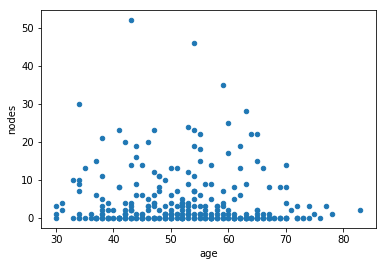

In [8]:
# simple scatter plot
df.plot(kind="scatter",x = "age",y="nodes")
plt.show()

1. We are unable to differentiate between survived and not survived points.
2. Nodes are concentrated much in the area where age is geater than or equal to 45 and less than or equal to 60

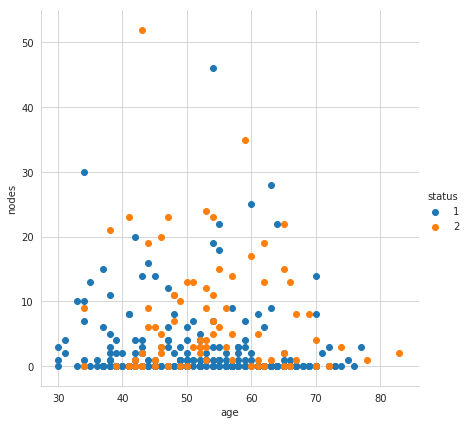

In [9]:
# Applying color to scatter plot
# Making use of seaborn

sb.set_style("whitegrid")
sb.FacetGrid(df,hue="status",height = 6)\
    .map(plt.scatter,"age","nodes")\
    .add_legend()

plt.show()

1. Both the points are much overlapped, so cannot make a proper conclusion

#### Mutli-variate plot

#### 1.1) pair plot

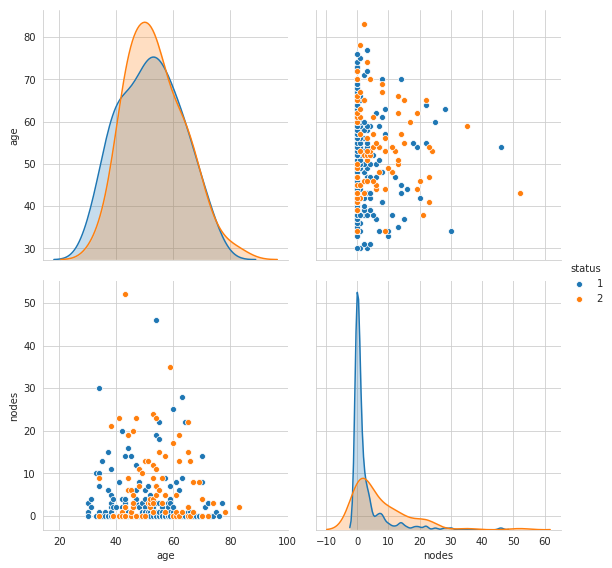

In [10]:
haberSet = df[["age","nodes","status"]]
sb.set_style("whitegrid")
sb.pairplot(haberSet,x_vars=("age","nodes"),y_vars=("age","nodes"),hue="status",height = 4)
plt.show()

1. It is harder to separate age from nodes that matter for survival status.
2. We can conclude that both the features are important for knowing the survival status.
3. In the PDF though the survival status is overlapped, we can somewhat see the higher survival status for nodes between 1 to 3 or 4

### Univariate plots

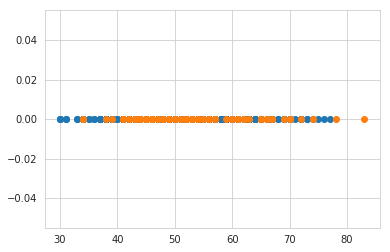

In [11]:
survived = df.loc[df["status"] == 1]
not_survived = df.loc[df["status"] == 2]

# Ploting on basis of age

plt.plot(survived["age"],np.zeros_like(survived["age"]),'o')
plt.plot(not_survived["age"],np.zeros_like(not_survived["age"]),'o')
plt.show()

1. The points are overlapped, so cannot conclude on the basis of age

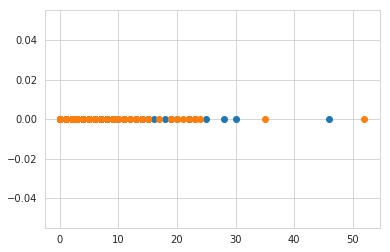

In [12]:
# plotting on basis of nodes

plt.plot(survived["nodes"],np.zeros_like(survived["nodes"]),'o')
plt.plot(not_survived["nodes"],np.zeros_like(not_survived["nodes"]),'o')
plt.show()
         

1. Here too the points seems to be much overlapped, so cannot find a proper conclusion

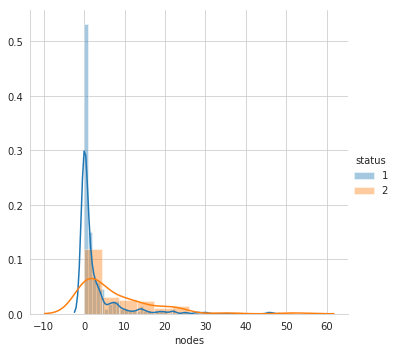

In [13]:
sb.set_style("whitegrid")
sb.FacetGrid(df,hue="status",height=5)\
.map(sb.distplot,'nodes')\
.add_legend()

plt.show()

## Considering the above graph observation of nodes.
1. We can conclude that

    if the nodes <= 2, then the chances of surviving is more.

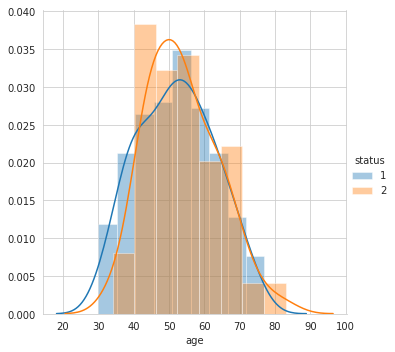

In [14]:
sb.set_style("whitegrid")
sb.FacetGrid(df,hue="status",height=5)\
.map(sb.distplot,"age")\
.add_legend()

plt.show()

The curves are very much overlapped, hence we cannot conclude on basis of age.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


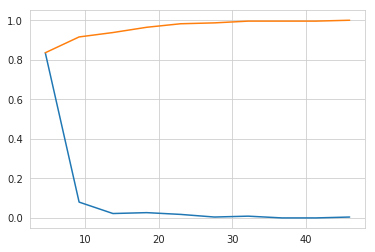

In [35]:
# Interpreting a PDF

# As we concluded above nodes feature plays an important role than Age

# Plot CDF of nodes

counts, bin_edges = np.histogram(survived['nodes'],bins=10,density=True)
pdf = counts/sum(counts)

print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()


We can see from this graph, 80% of surving data points get covered when nodes <= 3

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[0.39506173 0.56790123 0.62962963 0.71604938 0.7654321  0.85185185
 0.86419753 0.90123457 0.96296296 0.97530864 0.97530864 0.97530864
 0.97530864 0.98765432 0.98765432 0.98765432 0.98765432 0.98765432
 0.98765432 1.        ]


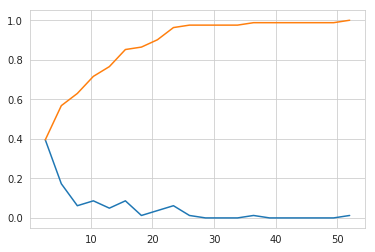

In [37]:
counts,bin_edges = np.histogram(not_survived['nodes'],bins=20,density=True)

pdf = counts/sum(counts)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

We can see from this graph, 40% of non-surving data points get covered when nodes <= 4

In [ ]:
# Plots for age

counts,bin_edges = np.histogram(survived["age"],bins=20,density=True)

counts